# Clean and Analyze Employees Exit Surveys
Credit to David Chung, May 7th, 2020

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland))(DETE) and the Technical and Further Education(TAFE) institute in Queensland, Australia. You can find the DETE exit survey [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the survey for the TAFE [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

The encoding was changed from `cp1252` to `UTF-8` to make them easier to work with.

In this project, we'll play the role of data analyst and pretend our stackholders want to know the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What anout older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Let's start by reading the datasets into pandas and exploring them.

In [1]:
# import libraries as below to begin with
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read csv file into pandas dataframe
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### Check State of DataFrame

##### DETE

In [3]:
# review information of dete_survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In dete_survey, we take a look into `ID`, `SeperationType`, `Cease Date` and `DETE Start Date` and here's my observations:
1. There're 822 data in total.
2. We need to rename column names to uppercase for easy reading.
3. We need to review seperation type and rename data with dictionary.
4. Cease date is in mm/yyyy format and in string type.
5. There're missing values in DETE Start Date and we'll follow workflow of data cleaning to decide what to do.

##### TAFE

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In tefe_survey, we take a look into `Recoded ID`, `Reason for ceasing employment` and `LengthofServiceOverall. Overall Length of Service at Institute (in years)` and here's my observations:
1. There're 702 data in total.
2. Recorded ID has too many decimal points, maybe we can slightly correct for easy reading.
3. We need to rename column names for better searching.
4. Value in `LengthofServiceOverall` is a string of year range, maybe we can replace them as mean number for future analysis.

### Identify Missing Values and Drop Unnecessary Columns

From our work in the previous screen, we can first make the following observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [9]:
# read the dete_survey file into pandas again
# but this time read the "Not Stated" values in as "NaN" 
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [10]:
# drop columns which we won't use for analysis
# dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

# tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


### Clean Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

Because we eventually want to combine them, we'll have to standardize the column names. Recall that we can use the `DataFrame.columns` attribute along with vectorized string methods to update all of the columns at once. 

In [11]:
# rename the remaining columns in lowercase, 
# remove whitespace and replace space with underline
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")

In [12]:
# use dataframe.rename() to update column names
# for tefe_survey_updated
cols_dict = {"Record ID":"id", "CESSATION YEAR":"cease_date",
             "Reason for ceasing employment": "separationtype",
             "Gender. What is your Gender?": "gender","CurrentAge. Current Age": "age",
             "Employment Type. Employment Type": "employment_status",
             "Classification. Classification": "position",
             "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
             "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"}
tafe_survey_updated = tafe_survey_updated.rename(columns = cols_dict)
        

In [13]:
# look at the current state of both dataframe
print(dete_survey_updated.head(5))
print("-------------------------")
print(tafe_survey_updated.head(5))

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

The main reason to change column names in both surveys is that we can make plots and directly compare with values with each other.

The column names of Tafe_survey_updated is much more different with Dete_survey_updated. So we need to build a dictionary to change name of Tafe while we only need to use function for Dete. 

### Filter the Data

In the last screen, we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

If you're interested in a challenge, try to complete the project using all of the separation types instead - you'll find more issues to work through in the data cleaning process.

Note that `dete_survey_updated` dataframe contains multiple separation types with the string `'Resignation'`:
- Resignation - Other reasons
- Resignation - Other employer
- Resignation - Move overseas/interstate

In [14]:
# review the unique values in both dataframe
# dete_survey_updated
print(dete_survey_updated["separationtype"].value_counts())
print()

# tafe_survey_updated
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In order to analyze the dissatisfaction status of employees working short or long, we'd like to select the data with "Resignation" only. Remember there're three kinds of resignation in dete_survey_updated.

In [15]:
# dete_survey_updated
# select rows based on multiple values
# df[df["column_name].isin(["value_1", "value_2"])]
resignation_list = ["Resignation-Other reasons","Resignation-Other employer", "Resignation-Move overseas/interstate"]
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].isin(resignation_list)].copy()


In [16]:
# tafe_survey_updated
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"].copy()


We use `Series.value_counts()` to review unique values. There's 311 employees exit for resignation in dete_survey, and 340 employees in tafe_survey.

Since we'd like to analyze further for employees exit for resignation, we have to select the data with "resignation" in `separation` column.

dete_survey has 3 kinds of resignation so we need to select rows based on multiple values. After [searching](https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/), we decide to use `df[df["column_name"].isin(["value_1","value_2"])]` method.

For tafe_survey, since there's only one kind of resignation, we can easily use boolean indexing to select rows.

### Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. However, we encourage you to check the data for other issues as well!

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [17]:
# view the unique values in cease_date
# select only year part and convert the float type
print(dete_resignations["cease_date"].value_counts())
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:].astype(float)


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64


In [18]:
# Use series.value_counts().sort_values() 
# to check the values
dete_resignations["cease_date"].value_counts().sort_values(ascending=False)


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
# Use series.value_counts().sort_index()
# to check the values by index
s1 = dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)
print(s1.head(10))

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
Name: dete_start_date, dtype: int64


In [20]:
# distribution for cease_date in descending way
# tafe
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)


2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

The year in `cease_date` column of dete_resignation is string type. Some are {yyyy} format and some are {mm/yyyy}, and we'd like to unite the format to be {yyyy}. First, we use `series.str()` to select the last four words. Second, we chain `series.astype(float)` to change type of value.

Then we review values in `cease_date` and `dete_start_date` whether it's beyond our acceptance. (start_date earlier than 1940 or cease_date later than current date.) Luckily, there's no values beyond boundaries so we can move on.

### Create a New Column

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [21]:
# subtract "cease_date" by "dete_start_date"
# assign the result to a new column "institute_service"
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]


We have to keep in mind that our final goal is to answer:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

So we need to calculate the service length by subtracting `dete_start_date` from `cease_date`, and assign the result to a new column `institute_service`.

### Identify Dissatisfied Employees

In [22]:
# Convert the values to True, False or NaN
# # "Contributing Factors. Dissatisfaction" column
# tafe_resignations["Contributing Factors. Dissatisfaction"] = tafe_resignations["Contributing Factors. Dissatisfaction"].str.replace("-","False").str.replace("Contributing Factors. Dissatisfaction","True")

# # "Contributing Factors. Job Dissatisfaction" column
# tafe_resignations["Contributing Factors. Job Dissatisfaction"] = tafe_resignations["Contributing Factors. Job Dissatisfaction"].str.replace("-","False").str.replace("Job Dissatisfaction","True")


In [23]:
tafe_cols = ["Contributing Factors. Dissatisfaction",
            "Contributing Factors. Job Dissatisfaction"]
dete_cols = ["job_dissatisfaction", "dissatisfaction_with_the_department",
            "physical_work_environment","lack_of_recognition",
            "lack_of_job_security","work_location",
            "employment_conditions","work_life_balance","workload"]

# write a function which transforms NaN to np.nan; "-" to False
# other situation to True
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

# tafe_resignations
# use df.applymap(function).any(axis=1,skipna=False)
tafe_resignations["dissatisfied"] = tafe_resignations[tafe_cols].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# dete_resignations
dete_resignations["dissatisfied"] = dete_resignations[dete_cols].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [24]:
# TAFE
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
# DETE
dete_resignations_up["dissatisfied"].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

We write a function to transform value into the format we expected and sort the resignation reasons of dissatisfied into groups.

### Combine the Data

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, it's time to combine both datasets! Our end goal is to aggregate the data according to the `institute_service` column.

In [26]:
# create a new column for easy distinguishing where the survey comes from

dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [27]:
# Combine both dataframes, assign to combined
combined = pd.concat([dete_resignations_up ,tafe_resignations_up])


In [28]:
# use df.dropna(thresh=x) to remove any columns(axis=1)
# with less than 500 non-null values, x=500
combined_updated = combined.dropna(axis=1, thresh=500)

# df.notnull().sum() to check if result is what we expected
combined_updated.notnull().sum()

age                  596
cease_date           635
dissatisfied         643
employment_status    597
gender               592
id                   651
institute            651
institute_service    563
position             598
separationtype       651
dtype: int64

After many cleaning steps, we're finally ready to combine both datasets. Our goal is to aggregate the data according to institute_service(how many years working here) column.

We want to remove some columns with too many null values. Since there're 651 datas and we decide to keep columns with more than 500 not-null values to make further analysis.

### Clean the Service Column

Classify the employees into four groups:
* Newbie(Less than 3 years)
* Sophomore(3-6 years)
* Tenured(7-10 years)
* Sage(11 or more years)

In [29]:
# convert value into string type, extract number only
# convert the result back to float and assign to new column
years = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)", expand=True).copy()
combined_updated["institute_service_up"] = years.astype(float)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
# write a function to classify into groups
# remember to classify null value seperately
def classify_year(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "Newbie"
    elif 3 <= val <7:
        return "Sophomore"
    elif 7 <= val <11:
        return "Tenured"
    else:
        return "Sage"

#  apply function and assign into new column
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(classify_year)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
# check if the result is what we expect

# combined[combined["service_cat"] == "Tenured"]
# combined[combined["service_cat"] == "Sage"]
# combined[combined["service_cat"] == "Newbie"]
# combined[combined["service_cat"] == "Sophomore"]


If we look into `institute_service` column, we can find the format is inconsistent and hard to analyze. So we convert values into string dtype, extract only digits and convert back to float dtype. Finally, we assign new values into new column `institute_service_up`

We write a function in order to classify values of `institute_service_up` into four groups: Newbie, Sophomore, Tenured and Sage. Use series.apply() to activate the function and assign it into new column `service_cat`

Remember to check if the result is what we expected. 

### Perform Initial Analysis

In [37]:
# confirm the number of True & False in dissatisfied column
# use dropna=False to also confirm number of missing value

combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
# use DataFrame.fillna() to replace missing value 
# with the value that occurs most frequently
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
# use DataFrame.pivot_table(df, index, column, value, aggfunc)
# default aggfunc is mean
# since True is considered as 1 and False as 0
# mean value in this situation can be considered as percentage
dissatisfied_by_year = pd.pivot_table(combined_updated, index=["service_cat"], values=["dissatisfied"])
dissatisfied_by_year


,dissatisfied
service_cat,
Newbie,0.295337
Sage,0.485294
Sophomore,0.343023
Tenured,0.516129


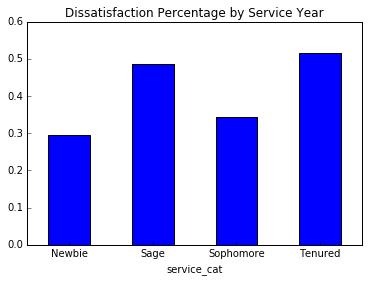

In [41]:
# make a bar plot to show dissatisfaction percentage by service year
dissatisfied_by_year.plot(kind="bar", legend=None, title="Dissatisfaction Percentage by Service Year",rot=0)
plt.tick_params(right="off", top="off")
plt.show()

We replace missing values of column dissatisfied with most frequent values `False`. Then, use pivot_table() to generate a table. True is considered as 1 while False as 0, plus the defalut aggfunc of pivot_table is `mean`. We don't need to set aggfunc and we can get mean values which can be considered as percentage in this situation.

We can plot the table and make some brief conclusion:
1. For employees worked for lower than 7 years, they are less likely to resign due to dissatisfied reasons(about 30%).
2. For employees worked for over 7 years, they are more likely to resign due to dissatisfation(about 50%).

According to this brief conclusion, if we're manager of these companies, we should take opinions from employees who worked for many years seriously or we'll easily lose their loyalty.

### Next Steps

##### How many people in each career stage resigned due to some kind of dissatisfaction?

In [45]:
grouped = combined_updated.groupby(["service_cat","dissatisfied"])["service_cat"].agg("count")
print(grouped)

service_cat  dissatisfied
Newbie       False           136
             True             57
Sage         False            70
             True             66
Sophomore    False           113
             True             59
Tenured      False            30
             True             32
Name: service_cat, dtype: int64


The number exit for dissatisfied of Newbie: 57

The number exit for dissatisfied of Sophomore: 59

The number exit for dissatisfied of Tenurated: 32

The number exit for dissatisfied of Sage: 66

##### Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?


In [51]:
# review the value status and figure out how to clean data
combined_updated["age"].head()

3     36-40
5     41-45
8     31-35
9     46-50
11    31-35
Name: age, dtype: object

In [52]:
combined_updated["age_up"] = combined_updated["age"].str.extract(r"(\d+)", expand=True).astype(float)
combined_updated["age_up"].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_up, dtype: int64

In [54]:
def classify_age(val):
    """
    classify the age into groups
    """
    if pd.isnull(val):
        return np.nan
    elif val < 30:
        return "30 or less"
    elif 30< val< 40:
        return "30s"
    elif 40< val< 50:
        return "40s"
    else:
        return "50 or more"
    
combined_updated["age_cat"] = combined_updated["age_up"].apply(classify_age).copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
combined_updated["age_cat"].value_counts(dropna=False)

40s           174
50 or more    149
30 or less    139
30s           134
NaN            55
Name: age_cat, dtype: int64

In [56]:
# Use groupby to see how many people by age are dissatisfied
combined_updated.groupby(["age_cat","dissatisfied"])["age_cat"].agg("count")

age_cat     dissatisfied
30 or less  False            90
            True             49
30s         False            86
            True             48
40s         False           108
            True             66
50 or more  False            86
            True             63
Name: age_cat, dtype: int64

The number exit for dissatisfied of 30 or less: 49

The number exit for dissatisfied of 30s: 48

The number exit for dissatisfied of 40s: 66

The number exit for dissatisfied of 50 or more: 63

##### Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [ ]:
# recall there's a "institute" column stored 
# where this data comes from
# see total amounts
combined.groupby(["institute","dissatisfied"])["institute"].agg("count")

In [ ]:
# see percentage
pd.pivot_table(combined, index=["institute"], values=["dissatisfied"])

From both total amounts(149>91) and percentage(47%>26%), we can realize more employees from DETE resigned due to dissatisfaction reasons.